### Importación de datos



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



###Concatenar todas las tiendas en un solo DataFrame

In [12]:

# Cargar y asignar nombre de tienda
tienda["Tienda"] = "Tienda_1"

tienda2["Tienda"] = "Tienda_2"

tienda3["Tienda"] = "Tienda_3"

tienda4["Tienda"] = "Tienda_4"

df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Crear columna de ingresos
df["Ingreso_Total"] = df["Precio"] + df["Costo de envío"]

df.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda,Ingreso_Total
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda_1,171200.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda_1,200700.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda_1,225500.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda_1,798500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda_1,355400.0


###Facturación por tienda

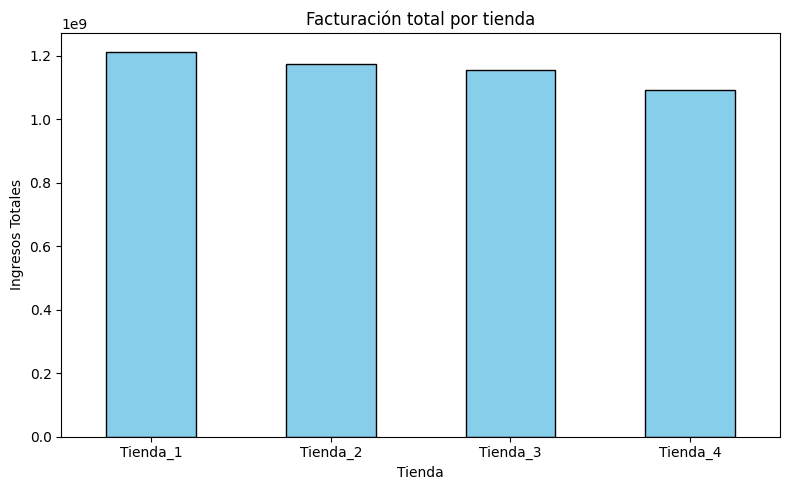

,Ingreso_Total
Tienda,
Tienda_1,1.212258e+09
Tienda_2,1.175829e+09
Tienda_3,1.156536e+09
Tienda_4,1.093693e+09


In [15]:
import matplotlib.pyplot as plt

facturacion = df.groupby("Tienda")["Ingreso_Total"].sum()

plt.figure(figsize=(8,5))
facturacion.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Facturación total por tienda")
plt.ylabel("Ingresos Totales")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


facturacion


# 2. Ventas por categoría

In [16]:
ventas_categoria = df.groupby(["Tienda","Categoría del Producto"])["Producto"].count().reset_index()
ventas_categoria = ventas_categoria.rename(columns={"Producto":"Cantidad_Vendida"})

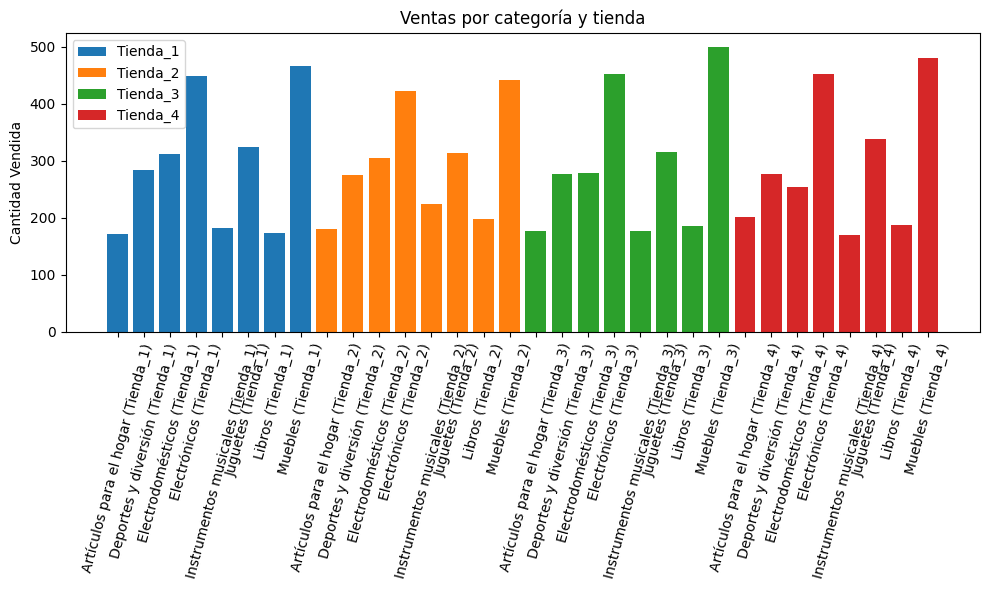

,Tienda,Categoría del Producto,Cantidad_Vendida
0,Tienda_1,Artículos para el hogar,171
1,Tienda_1,Deportes y diversión,284
2,Tienda_1,Electrodomésticos,312
3,Tienda_1,Electrónicos,448
4,Tienda_1,Instrumentos musicales,182


In [17]:
plt.figure(figsize=(10,6))
for tienda in ventas_categoria["Tienda"].unique():
    subset = ventas_categoria[ventas_categoria["Tienda"] == tienda]
    plt.bar(subset["Categoría del Producto"] + " ("+tienda+")",
            subset["Cantidad_Vendida"], label=tienda)

plt.title("Ventas por categoría y tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=75)
plt.legend()
plt.tight_layout()
plt.show()

ventas_categoria.head()

# 3. Calificación promedio de la tienda


In [18]:
calificaciones = df.groupby("Tienda")["Calificación"].mean().round(2)

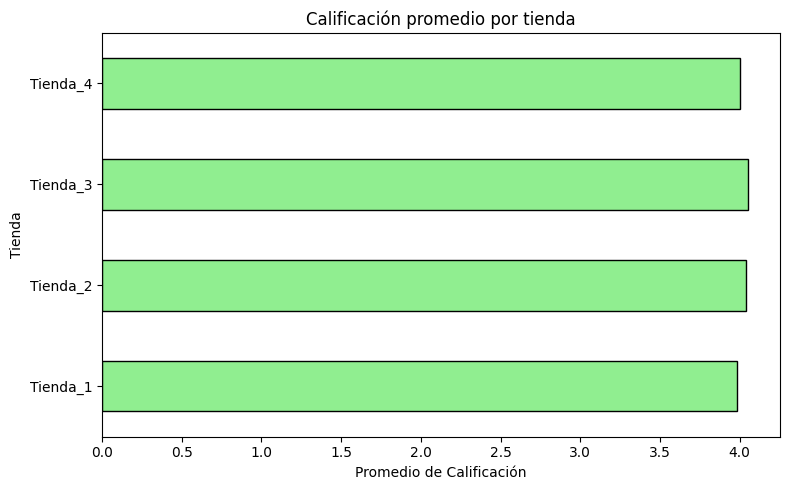

,Calificación
Tienda,
Tienda_1,3.98
Tienda_2,4.04
Tienda_3,4.05
Tienda_4,4.00


In [19]:
plt.figure(figsize=(8,5))
calificaciones.plot(kind="barh", color="lightgreen", edgecolor="black")
plt.title("Calificación promedio por tienda")
plt.xlabel("Promedio de Calificación")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

calificaciones

# 4. Productos más y menos vendidos

In [20]:
productos = df.groupby(["Tienda","Producto"])["Producto"].count().rename("Cantidad_Vendida").reset_index()
top5 = productos.sort_values(["Tienda","Cantidad_Vendida"], ascending=[True,False]).groupby("Tienda").head(5)

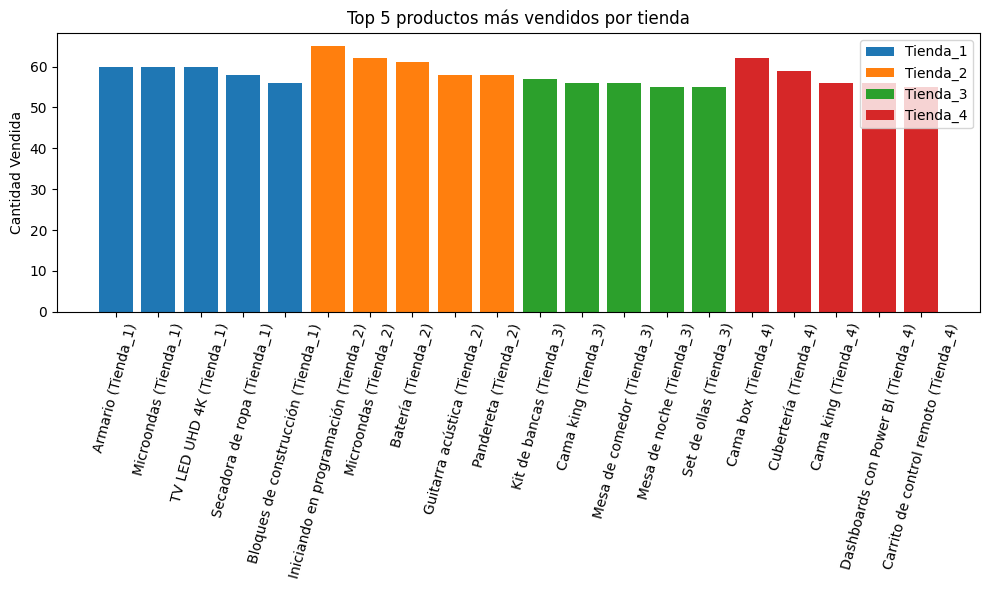

,Tienda,Producto,Cantidad_Vendida
1,Tienda_1,Armario,60
33,Tienda_1,Microondas,60
48,Tienda_1,TV LED UHD 4K,60
40,Tienda_1,Secadora de ropa,58
9,Tienda_1,Bloques de construcción,56
75,Tienda_2,Iniciando en programación,65
84,Tienda_2,Microondas,62
58,Tienda_2,Batería,61
72,Tienda_2,Guitarra acústica,58
89,Tienda_2,Pandereta,58


In [21]:
plt.figure(figsize=(10,6))
for tienda in top5["Tienda"].unique():
    subset = top5[top5["Tienda"] == tienda]
    plt.bar(subset["Producto"] + " ("+tienda+")",
            subset["Cantidad_Vendida"], label=tienda)

plt.title("Top 5 productos más vendidos por tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=75)
plt.legend()
plt.tight_layout()
plt.show()

top5

# 5. Envío promedio por tienda

In [22]:
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().round(2)


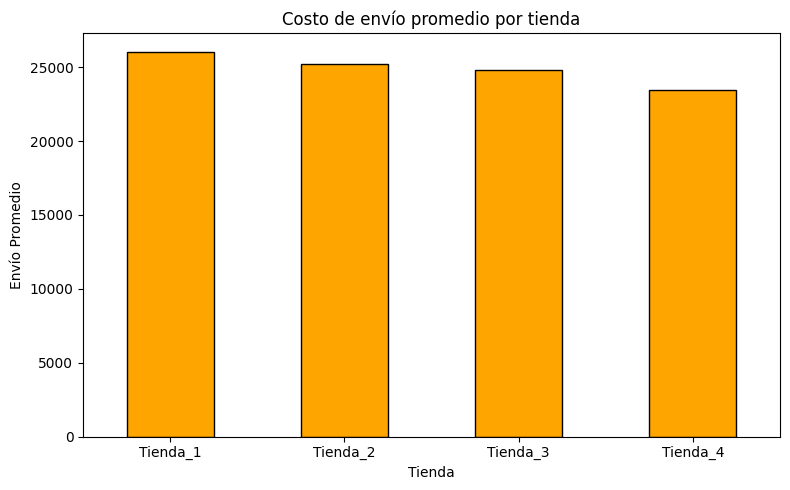

,Costo de envío
Tienda,
Tienda_1,26018.61
Tienda_2,25216.24
Tienda_3,24805.68
Tienda_4,23459.46


In [23]:
plt.figure(figsize=(8,5))
envio_promedio.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Envío Promedio")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

envio_promedio

# 6. Resumen

In [25]:
tienda_menor_facturacion = facturacion.idxmin()
tienda_peor_calificacion = calificaciones.idxmin()
tienda_envio_mas_caro = envio_promedio.idxmax()

print("📊 Resumen del análisis:")
print(f"- La tienda con menor facturación es {tienda_menor_facturacion} con {facturacion.min():,.0f} en ingresos.")
print(f"- La tienda con peor calificación es {tienda_peor_calificacion} con promedio {calificaciones.min():.2f}.")
print(f"- La tienda con envío más caro es {tienda_envio_mas_caro} con un costo promedio de {envio_promedio.max():,.0f}.")
print("\n Recomendación: El Sr. Juan debería considerar vender la tienda con menor facturación y peor desempeño general.")


📊 Resumen del análisis:
- La tienda con menor facturación es Tienda_4 con 1,093,693,100 en ingresos.
- La tienda con peor calificación es Tienda_1 con promedio 3.98.
- La tienda con envío más caro es Tienda_1 con un costo promedio de 26,019.

 Recomendación: El Sr. Juan debería considerar vender la tienda con menor facturación y peor desempeño general.
